
# Project 2: Investigate a Dataset (Medical Appointment No-shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we'll be analyzing data associated with no-show appointments. The dataset includes 110527 medical appointments described with 14 variables. 

### &emsp; Variables: 
>**1. PatientId** <br>
&emsp; Identification of a patient. <br>
**2. AppointmentID** <br>
&emsp; Identification of each appointment. <br>
**3. Gender** <br>
&emsp; Male or Female. <br>
**4. ScheduledDay** <br>
&emsp; The day of the actuall appointment, when they have to visit the doctor.<br>
**5. AppointmentDay** <br>
&emsp; The day someone called or registered the appointment, this is before appointment of course.<br>
**6. Age** <br>
&emsp; How old is the patient.<br>
**7. Neighbourhood** <br>
&emsp; Where the appointment takes place.<br>
**8. Scholarship** <br>
&emsp; True of False. Iindicates whether or not the patient is enrolled in Brasilian welfare program <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia"> Bolsa Família</a>. <br>
**9. Hipertension** <br>
&emsp; True or False.<br>
**10. Diabetes** <br>
&emsp; True or False.<br>
**11. Alcoholism** <br>
&emsp; True or False.<br>
**12. Handcap** <br>
&emsp; True or False.<br>
**13. SMS_received** <br>
&emsp; One or more messages sent to the patient.<br>
**14. No-show** <br>
&emsp; True or False.<br>

### &emsp; Research Questions: 
><a href="#q1">1. How many patients didn't show up for their appointment?</a><br> 
<a href="#q2">2. Is there any association between appointment no-shows and patinent's gender or age?</a><br> 
<a href="#q3">3. How do the other factors such as scholarship, medical condition, and SMS affect appointent no-shows?</a><br> 
<a href="#q4">4. What effect do the waiting days have on the rate of appointment no-shows?</a><br> 
<a href="#q5">5. Which neighbourhoods were associated with greater appointment no-shows?</a><br> 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading the dataset into a dataframe
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

> There are 110527 rows and 14 columns in this dataset

In [4]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Cheking null values 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# Cheking for duplicated values 
df.duplicated().sum()

0

> No null values or duplicate rows were found

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<br>


### Data Cleaning 



> * PatientId and AppointmentID seem to be unique identifiers. I will not be analyzing these two, so I will drop them.
> * Some columns need to be renamed: Hibertension to Hypertension, Handcap to Handicap, No-show to No_show
> * AppointmentDay and ScheduledDay columns are represented as an object(String), it should be converted to datetime
> * AppointmentDay column is missing the time portion, so we need to drop the time from the ScheduledDay column as well in order to make the data consistent.
> * The minimum age value is -1 which might be an error because age can't be a negative number. So this will be removed
> * The maximum value for Handicap is 4. According to the original source on Kaggle, this variable should have a boolean value. So any value higher than (0) will be changed to 1
> * The No-show column says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. I will replace the Yes and No values with 1s and 0s.

In [8]:
# Removing 'PatientId' and 'AppointmentID' 
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [9]:
# Renaming some columns 
df.rename(columns={'Hipertension': 'Hypertension','Handcap':'Handicap','No-show':'No_show'}, inplace=True)

In [10]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No_show'],
      dtype='object')

In [11]:
# Converting 'AppointmentDay' and 'ScheduledDay' datatype to datetime and removing time portion  
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

In [12]:
# Checking for negative age values
df[df['Age']<0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


> The output above shows that there is only 1 row with a negative age value, which will be removed

In [13]:
# Removing row with negative age values
df.drop(df.index[99832],inplace = True) 

In [14]:
# Converting Handicap values higher than 0 to 1
df['Handicap'] = np.where(df.Handicap > 0, 1, df.Handicap)
df['Handicap'].unique()

array([0, 1])

In [15]:
# Replacing the Yes and No values of the last column 'No_show'
df['No_show']=df['No_show'].replace({'No':0,'Yes':1})
df['No_show'].unique()

array([0, 1])

In [16]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

### Feature Engineering



> **Age group**<br>
&nbsp; &nbsp; &nbsp; &nbsp;The age variable has a relatively wide range of values, so it would make sense to creat categories

In [17]:
# Creating age_group column using Pandas cut() function to separate array elements into different bins
age_bins=[0,18,37,55,115]
age_groups=['0-18 years','19-37 years','38-55 years','56-115 years']
df['Age_group'] = pd.cut(df['Age'], age_bins, labels = age_groups, include_lowest=True)

df.Age_group.value_counts()


0-18 years      28866
56-115 years    27504
19-37 years     27250
38-55 years     26906
Name: Age_group, dtype: int64

> **Waiting days**  <br>
&nbsp; &nbsp; &nbsp; &nbsp; Using the scheduledDay and appointmentDay, we can find the duration between scheduling time and actual visit time

In [18]:
# Calculating waitingtime for each record by subtracting scheduled day from appointment day
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['WaitingDays'].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingDays, dtype: float64

In [19]:
# Rows with negative waiting time duration 
df[df['WaitingDays'] < 0 ]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_group,WaitingDays
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,1,38-55 years,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,19-37 years,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,1,19-37 years,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,56-115 years,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,1,0-18 years,-1


> From the summary statistics above, we can see that the minimum duration is negative! negative values mean that the appointment day is coming before the scheduled day. There are 5 rows with negative waiting duration, so I will remove these records

In [20]:
# Removing rows with negative waiting valuse
df = df[df['WaitingDays'] >= 0]

In [21]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_group,WaitingDays
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,56-115 years,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,56-115 years,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,56-115 years,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0-18 years,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,56-115 years,0


### Data Visualization

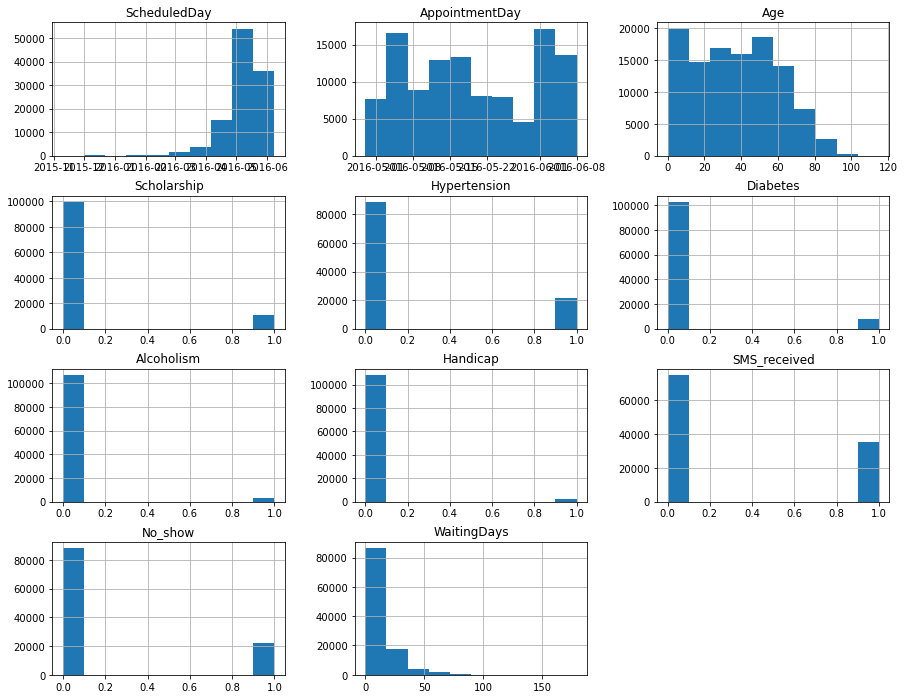

In [22]:
df.hist(figsize=(15,12));

<a id='q1'></a>
### Research Question 1: How many patients didn't show up for their appointment ?

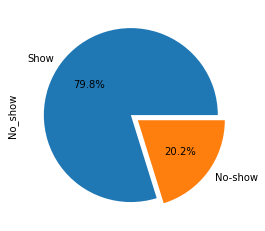

In [23]:
mylabels = ['Show', 'No-show']
myexplode = (0,0.1)
mycolors = ['tab:blue','tab:orange']
df.No_show.value_counts().plot.pie(labels = mylabels, explode=myexplode, colors = mycolors, autopct='%1.1f%%');



>The pie chart above shows that the percentage of patients who showed up for their appointments was roughly 80%, while the percentage of those who did not show up was about 20%

<a id='q2'></a>
### Research Question 2: Is there any association between appointment no-shows and patinent's gender or age?

In [24]:
# counts of appointments by gender
df['Gender'].value_counts()

F    71836
M    38685
Name: Gender, dtype: int64

In [25]:
df.groupby('Gender')['No_show'].value_counts()

Gender  No_show
F       0          57245
        1          14591
M       0          30962
        1           7723
Name: No_show, dtype: int64

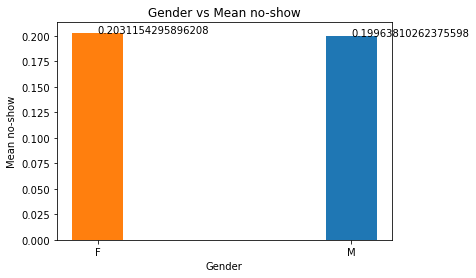

In [26]:
gender_mean = df.groupby('Gender')['No_show'].mean()
x = gender_mean.index
y = gender_mean.values
plt.bar(x,y,color=['tab:orange','tab:blue'], width=.2);
plt.xlabel('Gender')
plt.ylabel('Mean no-show')
plt.title('Gender vs Mean no-show')

for value, index in zip(y,x):
    plt.text(index,value,str(value))


> As we can see in the bar chart, the mean no-show was 0.203 for females, and 0.199 for males. Females appear to have a slightly higher no-shows mean than males.

In [27]:
# counts of appointments by age group
df['Age_group'].value_counts()

0-18 years      28865
56-115 years    27503
19-37 years     27248
38-55 years     26905
Name: Age_group, dtype: int64

In [28]:
df.groupby('Age_group')['No_show'].value_counts()

Age_group     No_show
0-18 years    0          22519
              1           6346
19-37 years   0          20836
              1           6412
38-55 years   0          21651
              1           5254
56-115 years  0          23201
              1           4302
Name: No_show, dtype: int64

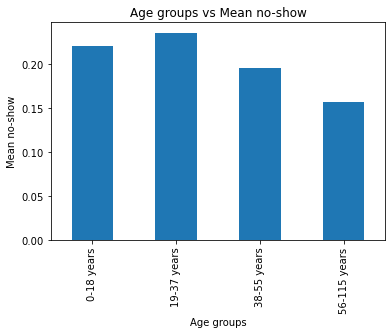

In [29]:
df.groupby('Age_group')['No_show'].mean().plot(kind='bar')
plt.ylabel('Mean no-show');
plt.xlabel('Age groups');
plt.title('Age groups vs Mean no-show');

> In all age groups, the no-show mean was highest in the age group of 19-37 years

<a id='q3'></a>
### Research Question 3: How do the other factors such as scholarship, medical condition, and SMS affect appointent no-shows?

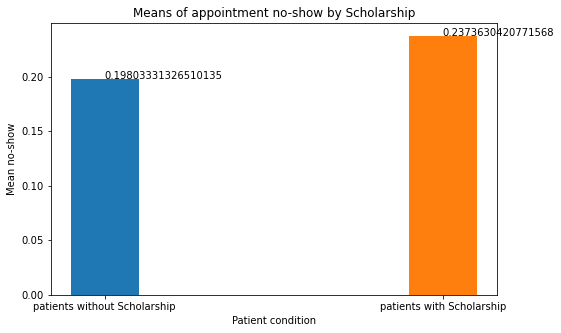

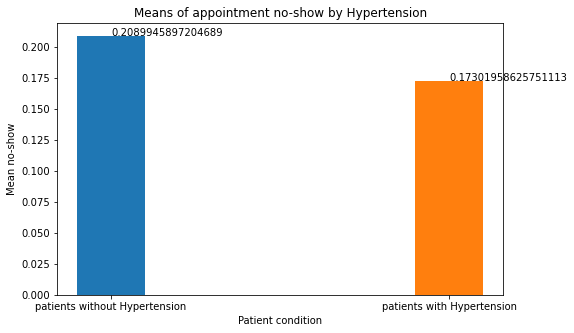

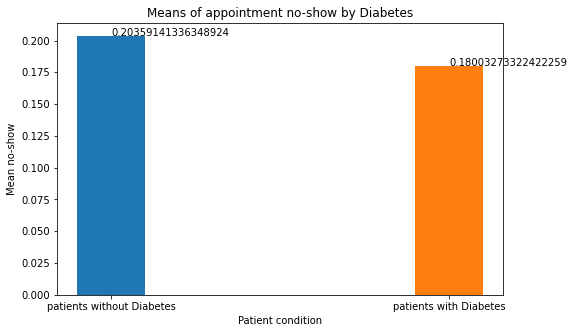

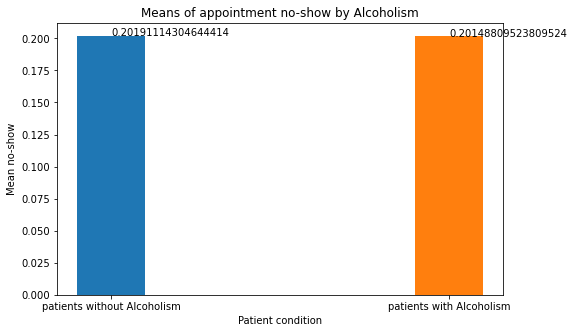

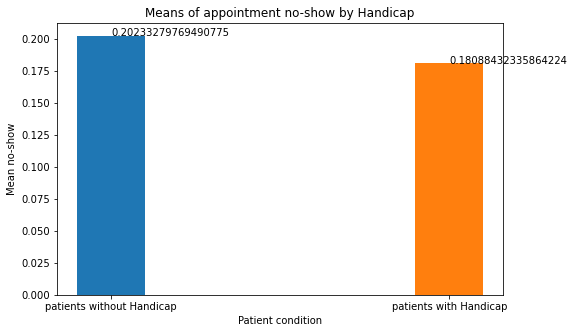

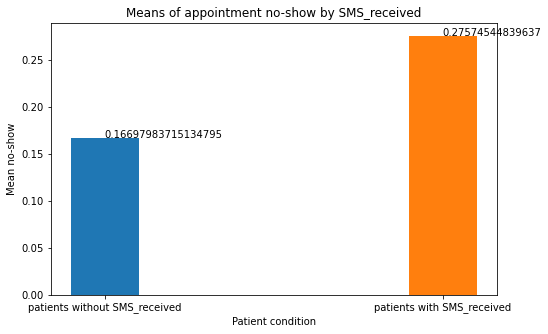

In [30]:
factors=['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap', 'SMS_received' ]
#loop to plot means of no show for patients with these characterstics.
for col in factors:
    mean = df.groupby(col)['No_show'].mean()
    x = mean.index
    y = mean.values
    
    plt.figure(figsize=(8,5))
    plt.bar(x, y, width=.2, color=['tab:blue','tab:orange'])
    
    plt.xlabel(col)
    plt.xticks(x,['patients without ' +col,'patients with '+col])
    plt.ylabel('Mean no-show')
    plt.xlabel('Patient condition')
    plt.title('Means of appointment no-show by '+col)
    for index, value in zip(x,y):
        plt.text(index,value,str(value))

> Patients with medical condition such as hypertension, diabetes, or handicap were found to have lower means of no-show values compared to patients who did not have any medical condition. Interestingly, the mean no-show rate was significantly greater (28%) for those patients who received SMS reminders.

<a id='q4'></a>
### Research Question 4: What effect do the waiting days have on the rate of appointment no-shows?

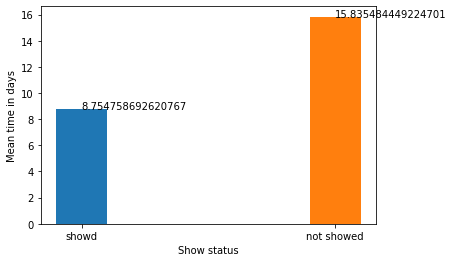

In [31]:
waiting_mean = df.groupby('No_show')['WaitingDays'].mean()
locations = [0,1]
plt.bar(locations, waiting_mean, color=['tab:blue','tab:orange'], width=.2)
plt.xticks(locations,['showd','not showed'])

plt.ylabel('Mean time in days')
plt.xlabel('Show status')

for index, value in zip(locations,waiting_mean):
    plt.text(index,value,str(value))

> From the above plot it can be seen that the mean waiting days was lower for patients who showed up for their appointments compared to those who did not

<a id='q5'></a>
### Research Question 5: Which neighbourhoods were associated with greater appointment no-shows?

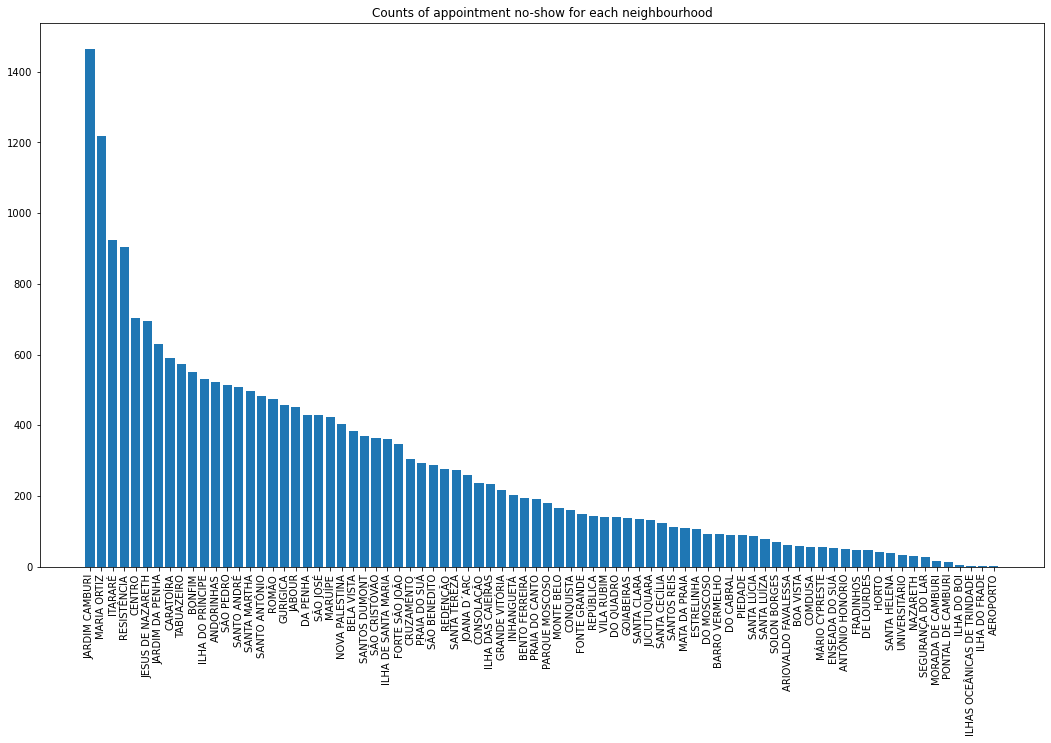

In [32]:

neighbourhood_counts = df[df['No_show']==1].groupby('Neighbourhood').count()['AppointmentDay'].sort_values(ascending=False)

plt.figure(figsize=(18, 10))
plt.bar(neighbourhood_counts.index, neighbourhood_counts)
plt.xticks(rotation=90)
plt.title('Counts of appointment no-show for each neighbourhood');


> The neighbourhoods with the highest no-show counts were Jardim Camburi and Maria Ortiz <br>
The neighbourhoods with the least no-show counts were Ilhas Oceanicas De Trindade, Ilha Do Frade and Aeroporto

<a id='conclusions'></a>
## Conclusions

### Findings

>* During April to June 2016, 110521 appointments were scheduled, among which 20% were no-show appointments.
>* The number of attended appointments was higher than missed appointments by almost four times. 
>* The mean no-show rate for females was slightly higher than males.
>* Most new patients between 38-115 years tended to attend their appointments, while patients between 19-37 years accounted for the majority of no-show appointments. 
>* Patients with medical condition such as hypertension, diabetes, or handicap were found to have lower means of no-show values compared to patients who did not have any medical condition.
>* Receiving an SMS reminder was associated with a higher mean number of no-shows.
>* The mean number of waiting days was lower for patients who showed up for their appointments compared to those who did not
>* The neighbourhoods of Jardim Camburi and Maria Ortiz were associated with higher numbers of appointment no-show.



### Limitations 
>* The data covers a short period of time (from 2016-04-29 to 2016-06-08), which doesn’t allow for sufficient time to understand the effects of seasons, weather conditions, and holidays on appointment no-shows.
>* Absence of detailed data about the distance between the patient and the neighborhood where the appointment takes place, public transportation status, traffic and road conditions. 
>* The analysis found that appointment no-shows were higher for those who received an SMS. However, the provided data and its nature prevent further investigation.
>* Additional information can be provided to enhance the results of the analysis such as prices, employment status of patients, and weather condition. 
>* I have not done any statistical tests in this analysis, thus can’t imply any statistical conclusions. 


## Resources
>https://www.codegrepper.com/code-examples/python/pandas+remove+time+from+datetime <br>
https://www.kite.com/python/answers/how-to-replace-elements-in-a-numpy-array-if-a-condition-is-met-in-python <br>
https://www.kite.com/python/answers/how-to-replace-column-values-in-a-pandas-dataframe-in-python <br>
https://stackoverflow.com/questions/52753613/grouping-categorising-ages-column-in-python-pandas <br>